---
title: "A National Historic Landmark"
description: "Fisher Fine Arts Library" 
author: "Angelica"
date: "12/10/2025"
categories:
  - LLMs
  - Prompting
  - Penn
---

After playing around with image generation in class, I wondered if an LLM would be able to create an image based on its own description. One of my favorite sights on campus is the Fisher Fine Arts Library. For reference, this is what it looks like:

<img src="fisher.jpg" width="50%"/>
<img src="inside.jpg" width="50%"/>

## Prompting

Here's how gpt4.0 responded when I asked: "Describe this image in detail."

For the exterior: 
The image features the Fisher Fine Arts Library at the University of Pennsylvania, located in Philadelphia. It is one of the most iconic architectural landmarks on Penn’s campus. The building is designed in the High Victorian Gothic style, sometimes referred to as Venetian Gothic, marked by its dramatic asymmetry, ornamental brickwork, and sculptural forms. This style was heavily influenced by medieval European architecture but interpreted in a bold, modern way for its time. The structure is constructed almost entirely of red brick and terracotta, lending it a warm, rust-colored appearance. The masonry is highly textured, with variations in the brick patterns and depth adding richness to the façade. On the right side of the image, there is a square tower with a castellated parapet (resembling battlements), arched windows, and ornamental stonework. This element reinforces the fortress-like look typical of Gothic revival buildings. The tower contains a set of tall stained glass arched windows framed by elaborate carvings, with a circular rose window motif above them. The left portion of the building shows a series of arched, double-hung windows set into deep red masonry, flanked by decorative brick insets. The steep, tiled gable roof features decorative dormers with a repeating triangular motif. Each dormer ends in a Gothic pinnacle, contributing to the upward thrust of the building’s design. The lower part of the building is composed of rusticated stonework, appearing solid and grounded. It gives the structure a strong, monumental feel. The leafless trees suggest the photo was taken in late fall or winter, and their bare branches partially obscure the entrance and windows. You can see benches, bicycles, and a few people, reinforcing the idea that this is an academic environment. A paved pathway and grassy lawn frame the foreground, typical of university quadrangles. This building was designed by Frank Furness, one of the most inventive American architects of the 19th century. It was completed in 1891. Originally built as Penn’s main library, it is now home to the university’s fine arts and architecture collections. The structure is a National Historic Landmark and is widely admired for its bold design and use of materials.

For the interior: 
This is a vast, cathedral-like reading room flooded with light and rich in ornamental detail. Designed by famed architect Frank Furness, the space reflects Victorian eclecticism and an emphasis on grandeur, structure, and decorative boldness. The ceiling soars multiple stories high and is framed by heavy dark wood trusses and supports. The most stunning feature is the massive glass skylight, composed of ornamental stained glass panels with circular floral or fan-like motifs. This allows natural light to cascade into the space during the day, reducing the need for artificial lighting. The interior walls are built in alternating bands of red brick and pale stone, echoing the bold exterior. At the lower level, you can see deep stone arches and load-bearing columns, which create a sense of both monumentality and enclosure. Above the arches are two floors of arched windows, which give the space a rhythmic, almost palatial feel. The upper walls feature detailed molding, geometric stone carvings, and various recessed stained glass windows. On the left wall is an ornate stone fireplace, framed by a massive arch with stepped voussoirs and topped with decorative medallions and carvings. While it may no longer function as a fireplace, it serves as a dramatic focal point. Surrounding architectural elements include sculptural friezes, carved reliefs, and grillwork panels with lattice designs. The floor is filled with rows of reading tables and study lamps, arranged for students to work in a quiet, contemplative environment. The space balances form and function — grand and inspiring, yet comfortable and designed for deep study.
Wooden chairs, warm table lighting, and casual lounge seating along the edges soften the monumental feel. This is a quiet study zone — often used by architecture, design, art history, and fine arts students. The combination of natural light, warm wood tones, and rich architectural detail creates a monastic yet welcoming environment for focused work. It’s a favorite spot not only for studying but also for admiring historic design and craftsmanship. This room was part of the original 1891 design of the library and has been preserved with care. Frank Furness designed the building not just to hold books but to inspire creativity and reverence for knowledge. The design was avant-garde for its time and remains a masterwork of American library architecture.

## Image Generation

Seems like more than enough of a description to create a replicated image of the library! Let's see what it can do.

In [21]:
from openai import OpenAI
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO

import requests

from IPython import display

from dotenv import load_dotenv
_ = load_dotenv()

In [22]:
client = OpenAI()

In [30]:
image_prompt1 = '''
          Create an image that features the Fisher Fine Arts Library at the University of Pennsylvania, located in Philadelphia. It is one of the most iconic architectural landmarks on Penn’s campus. The building is designed in the High Victorian Gothic style, sometimes referred to as Venetian Gothic, marked by its dramatic asymmetry, ornamental brickwork, and sculptural forms. This style was heavily influenced by medieval European architecture but interpreted in a bold, modern way for its time. The structure is constructed almost entirely of red brick and terracotta, lending it a warm, rust-colored appearance. The masonry is highly textured, with variations in the brick patterns and depth adding richness to the façade. On the right side of the image, there is a square tower with a castellated parapet (resembling battlements), arched windows, and ornamental stonework. This element reinforces the fortress-like look typical of Gothic revival buildings. The tower contains a set of tall stained glass arched windows framed by elaborate carvings, with a circular rose window motif above them. The left portion of the building shows a series of arched, double-hung windows set into deep red masonry, flanked by decorative brick insets. The steep, tiled gable roof features decorative dormers with a repeating triangular motif. Each dormer ends in a Gothic pinnacle, contributing to the upward thrust of the building’s design. The lower part of the building is composed of rusticated stonework, appearing solid and grounded. It gives the structure a strong, monumental feel. The leafless trees suggest the photo was taken in late fall or winter, and their bare branches partially obscure the entrance and windows. You can see benches, bicycles, and a few people, reinforcing the idea that this is an academic environment. A paved pathway and grassy lawn frame the foreground, typical of university quadrangles. This building was designed by Frank Furness, one of the most inventive American architects of the 19th century. It was completed in 1891. Originally built as Penn’s main library, it is now home to the university’s fine arts and architecture collections. The structure is a National Historic Landmark and is widely admired for its bold design and use of materials. 
           '''

image_prompt2 = '''
          Create an image of a vast, cathedral-like reading room flooded with light and rich in ornamental detail. Designed by famed architect Frank Furness, the space reflects Victorian eclecticism and an emphasis on grandeur, structure, and decorative boldness. The ceiling soars multiple stories high and is framed by heavy dark wood trusses and supports. The most stunning feature is the massive glass skylight, composed of ornamental stained glass panels with circular floral or fan-like motifs. This allows natural light to cascade into the space during the day, reducing the need for artificial lighting. The interior walls are built in alternating bands of red brick and pale stone, echoing the bold exterior. At the lower level, you can see deep stone arches and load-bearing columns, which create a sense of both monumentality and enclosure. Above the arches are two floors of arched windows, which give the space a rhythmic, almost palatial feel. The upper walls feature detailed molding, geometric stone carvings, and various recessed stained glass windows. On the left wall is an ornate stone fireplace, framed by a massive arch with stepped voussoirs and topped with decorative medallions and carvings. While it may no longer function as a fireplace, it serves as a dramatic focal point. Surrounding architectural elements include sculptural friezes, carved reliefs, and grillwork panels with lattice designs. The floor is filled with rows of reading tables and study lamps, arranged for students to work in a quiet, contemplative environment. The space balances form and function — grand and inspiring, yet comfortable and designed for deep study.
Wooden chairs, warm table lighting, and casual lounge seating along the edges soften the monumental feel. This is a quiet study zone — often used by architecture, design, art history, and fine arts students. The combination of natural light, warm wood tones, and rich architectural detail creates a monastic yet welcoming environment for focused work. It’s a favorite spot not only for studying but also for admiring historic design and craftsmanship. This room was part of the original 1891 design of the library and has been preserved with care. Frank Furness designed the building not just to hold books but to inspire creativity and reverence for knowledge. The design was avant-garde for its time and remains a masterwork of American library architecture.
           '''

In [24]:
response = client.images.generate(
  model="dall-e-3",
  prompt=image_prompt1,
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

In [25]:
response.data[0].revised_prompt

"Create an image showcasing the iconic Fisher Fine Arts Library at the University of Pennsylvania, located in Philadelphia. The building features a High Victorian Gothic style, with dramatic asymmetry, ornamental brickwork and sculptural forms. The red brick and terracotta construction gives it a warm, rust-colored appearance. The right side of the image contains a square tower with a castellated parapet, arched windows, and ornamental stonework. Tall stained glass arched windows are framed by elaborate carvings, with a circular rose window motif above. On the left, a series of arched, double-hung windows are set into deep red masonry, flanked by decorative brick insets. A steep, tiled gable roof boasts decorative dormers with Gothic pinnacles. The lower part of the building is composed of rusticated stonework, with leafless trees partially obscuring the entrance and windows. This scene includes benches, bicycles, and a few people of different descents and genders, emphasizing its acad

In [26]:
generated_image = requests.get(image_url)

with open('generated_img.png', 'wb') as out:
    out.write(generated_image.content)

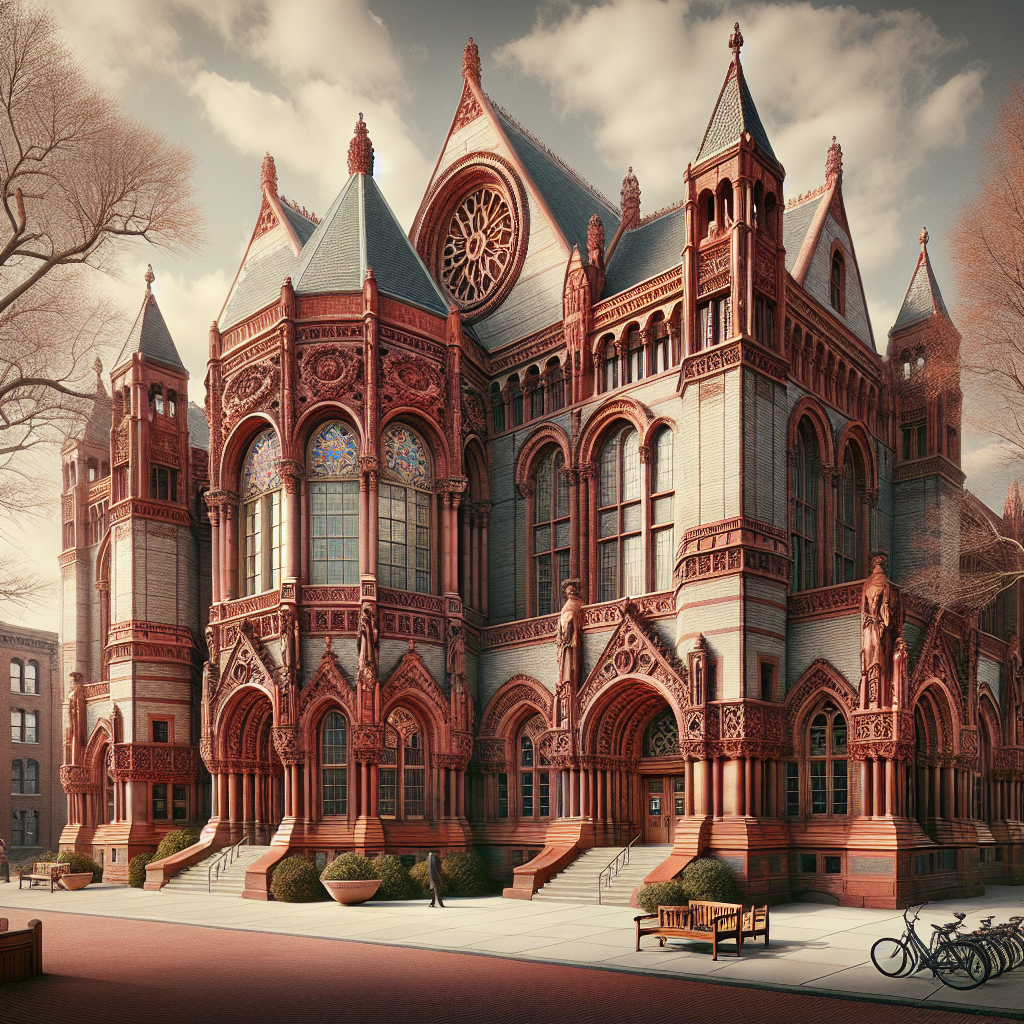

In [27]:
display.Image('generated_img.png')

In [31]:
response = client.images.generate(
  model="dall-e-3",
  prompt=image_prompt2,
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

In [33]:
response.data[0].revised_prompt

"Create an image of a vast reading room resembling a cathedral in its grandeur, pulling influences from Victorian eclecticism. The towering ceiling, held up by hefty dark-wood trusses, houses a stunning skylight made up of ornamentally stained glass panels in floral and fan motifs. Natural light streams in throughout the day, reducing the need for additional lighting. The room is adorned with red brick and pale stone walls that hold deep stone arches and load-bearing columns at the lower level. Two layers of arched windows align perfectly, enhancing the room's rhythm. The left wall proudly exhibits a grand stone fireplace trapped within a wide arch, surrounded by intricate carvings and medallions. Cool stone contrasts with the warmth of several reading tables set out in rows and their accompanying study lamps, inviting a peaceful study atmosphere. A well-preserved library room, it brims with a sense of history, architectural greatness and a genuine love for knowledge."

In [35]:
generated_image = requests.get(image_url)

with open('generated_img.png', 'wb') as out:
    out.write(generated_image.content)

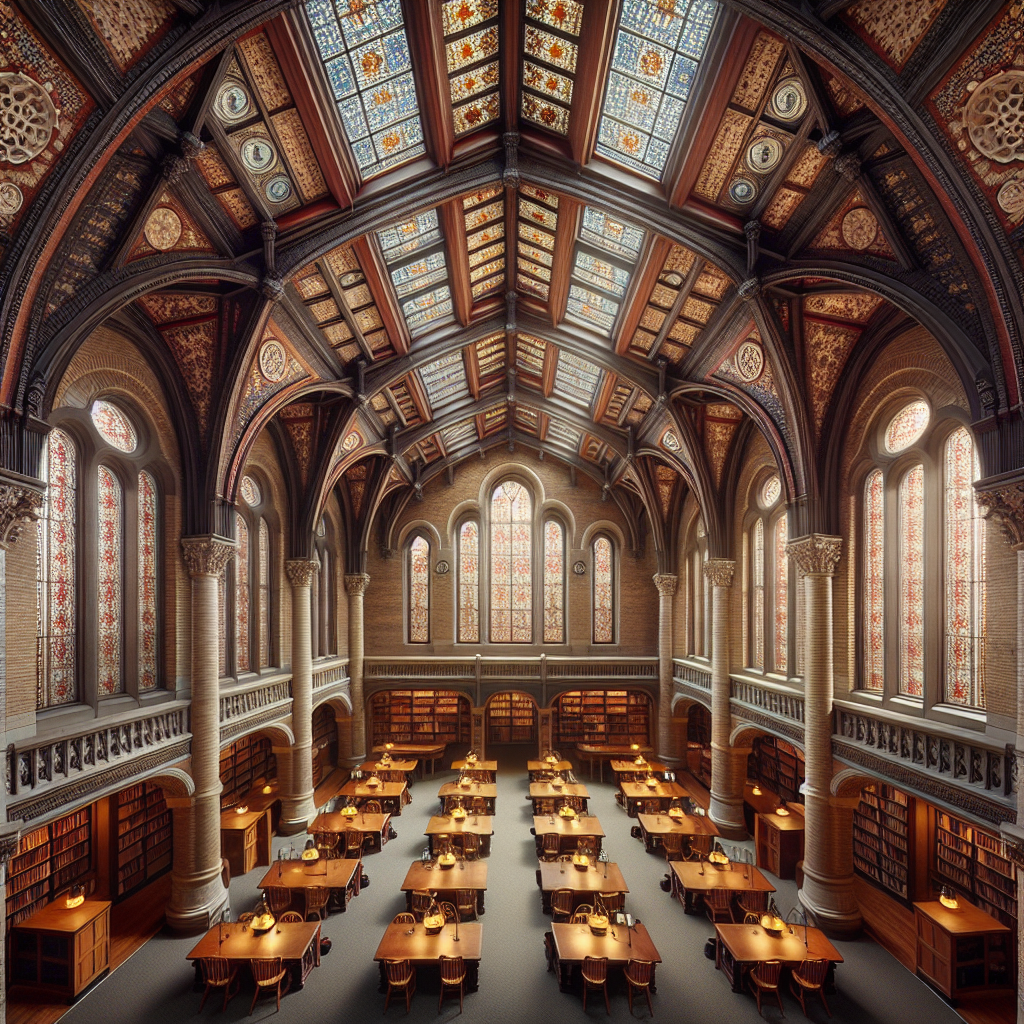

In [36]:
display.Image('generated_img.png')

Honestly not bad! I think AI generated images always have a slight glow to them that make them seem artifically generated. I wonder if one day it will implement more realisti features that look less animated. 